This file shows the results under different image transformations

-2 -1
-1


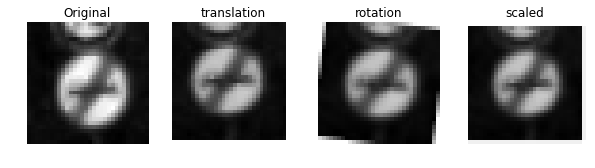

In [12]:
# Load pickled data
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython.display import Image
import pandas as pd
import numpy as np
import cv2
from math import ceil
from sklearn.utils import shuffle

%matplotlib inline

training_file = './imgs/train.p'

def open_file(input_file):
    with open(input_file, mode='rb') as f:
        output_file = pickle.load(f)
    X_data, y_data = output_file['features'], output_file['labels']
    return X_data, y_data


def reduce_channel(x):
    out = np.sum(x / 3, axis = 3, keepdims = True) 
    return out

def f_normalize(x):
    out =  (x - 128) / 128
    return out

i = 2
X_train, y_train = open_file(training_file)
X_train_gray = reduce_channel(X_train)
X_train = f_normalize(X_train_gray)
#plt.imshow(X_train[i].squeeze())

# translation 

dx, dy = np.random.randint(-2, 2, 2)
print (dx, dy)
M = np.float32([[1, 0, dx], [0, 1, dy]])
dst = cv2.warpAffine(X_train[i], M, (X_train[i].shape[0], X_train[i].shape[1]))
dst = dst[:,:,None]
#plt.imshow(dst.squeeze())

# rotation
tilt = np.random.randint(-10, 10)
M = cv2.getRotationMatrix2D((X_train[i].shape[0]/2, X_train[i].shape[1]/2), tilt, 1)
dst2 = cv2.warpAffine(X_train[i], M, (X_train[i].shape[0], X_train[i].shape[1]))
dst2 = dst2[:,:,None]
#plt.imshow(dst2.squeeze()) 

# warping
rows =32
cols = 32
# transform limits
px = np.random.randint(-3, 3)
print(px)
# ending locations
pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])
# starting locations (4 corners)
pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst3 = cv2.warpPerspective(X_train[i],M,(rows,cols))
dst3 = dst3[:,:,None]
#plt.imshow(dst3.squeeze()) 


_, axs = plt.subplots(1, 4, figsize=(10, 5))
axs = axs.ravel()

for i in range(4):
    if i == 0:
        axs[i].imshow(X_train[i].squeeze(), cmap = 'gray')
        axs[i].set_title('Original')
    elif i == 1:
        axs[i].imshow(dst.squeeze(), cmap = 'gray')
        axs[i].set_title('translation')
    elif i == 2:
        axs[i].imshow(dst2.squeeze(), cmap = 'gray')
        axs[i].set_title("rotation")
    else:
        axs[i].imshow(dst3.squeeze(), cmap = 'gray')
        axs[i].set_title("scaled")
    axs[i].axis('off')